Уравнение траектории катера:
r(θ) = r0 * e^(θ / 3.666)
Для случая 1: r(θ) = 3.471 * e^(θ / 3.666)
Для случая 2: r(θ) = 5.710 * e^(θ / 3.666)

Уравнение траектории лодки:
θ = 3π/4 (постоянный угол)


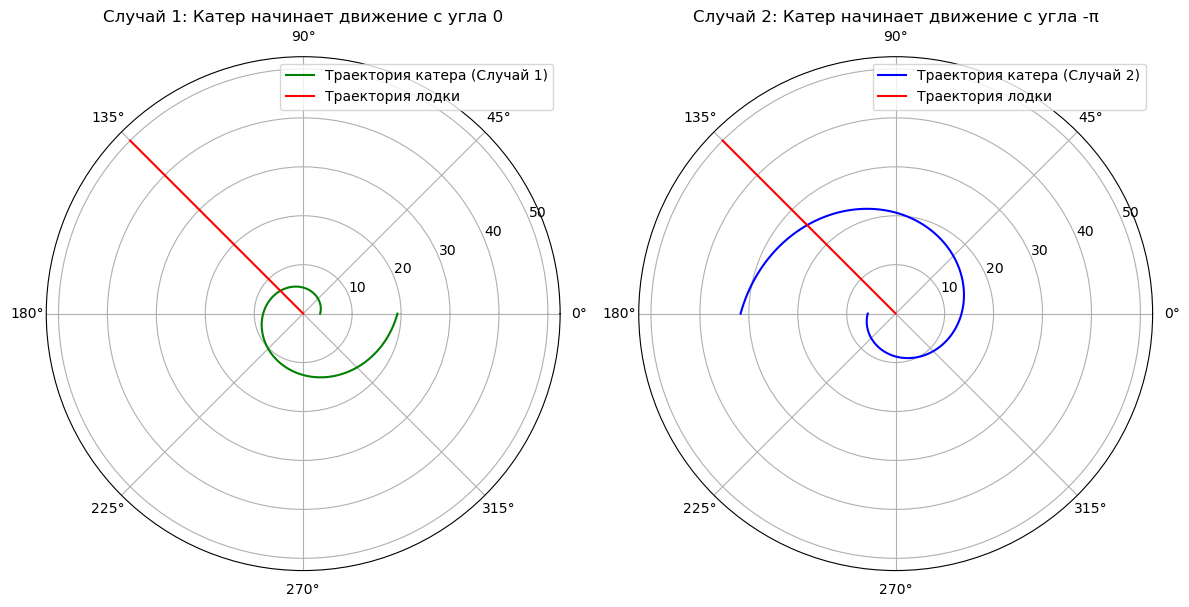


Точка пересечения для случая 1:
r = 6.600, θ = 2.356

Точка пересечения для случая 2:
r = 10.858, θ = 2.356


In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Начальные параметры
k = 17.7  # начальное расстояние между катером и лодкой
n = 3.8  # отношение скоростей катера и лодки

# Начальные условия для двух случаев
r0_case1 = k / 5.1  # начальное расстояние для случая 1
r0_case2 = k / 3.1  # начальное расстояние для случая 2
theta0_case1 = 0.0  # начальный угол для случая 1
theta0_case2 = -np.pi  # начальный угол для случая 2

# Функция для движения катера
def f(theta, r):
    return r / np.sqrt(n**2 - 1)

# Вывод уравнений
print("Уравнение траектории катера:")
print(f"r(θ) = r0 * e^(θ / {np.sqrt(n**2 - 1):.3f})")
print(f"Для случая 1: r(θ) = {r0_case1:.3f} * e^(θ / {np.sqrt(n**2 - 1):.3f})")
print(f"Для случая 2: r(θ) = {r0_case2:.3f} * e^(θ / {np.sqrt(n**2 - 1):.3f})")
print("\nУравнение траектории лодки:")
print("θ = 3π/4 (постоянный угол)")

# Диапазон углов для решения
theta_span = (0, 2 * np.pi)  # для случая 1
theta_span_case2 = (-np.pi, np.pi)  # для случая 2

# Решение дифференциального уравнения для случая 1
sol_case1 = solve_ivp(f, [0, 2 * np.pi], [r0_case1], t_eval=np.linspace(0, 2 * np.pi, 10000))  # Увеличили количество точек

# Решение дифференциального уравнения для случая 2
sol_case2 = solve_ivp(f, [-np.pi, np.pi], [r0_case2], t_eval=np.linspace(-np.pi, np.pi, 10000))  # Увеличили количество точек

# Траектория лодки (прямая линия в полярных координатах)
fi = 3 * np.pi / 4  # угол движения лодки
r_boat = np.linspace(0, 50, 1000)  # радиус для лодки

# Построение графиков
plt.figure(figsize=(12, 6))

# Случай 1
plt.subplot(1, 2, 1, projection='polar')
plt.plot(sol_case1.t, sol_case1.y[0], label='Траектория катера (Случай 1)', color='green')
plt.plot([fi] * len(r_boat), r_boat, label='Траектория лодки', color='red')  # Лодка: θ = 3π/4
plt.title("Случай 1: Катер начинает движение с угла 0")
plt.legend()

# Случай 2
plt.subplot(1, 2, 2, projection='polar')
plt.plot(sol_case2.t, sol_case2.y[0], label='Траектория катера (Случай 2)', color='blue')
plt.plot([fi] * len(r_boat), r_boat, label='Траектория лодки', color='red')  # Лодка: θ = 3π/4
plt.title("Случай 2: Катер начинает движение с угла -π")
plt.legend()

plt.tight_layout()
plt.show()

# Нахождение точки пересечения
# Для случая 1
theta_boat = fi  # Угол лодки
r_intersect_case1 = r0_case1 * np.exp(theta_boat / np.sqrt(n**2 - 1))  # r(θ) для катера

# Для случая 2
r_intersect_case2 = r0_case2 * np.exp(theta_boat / np.sqrt(n**2 - 1))  # r(θ) для катера

# Вывод точек пересечения
print("\nТочка пересечения для случая 1:")
print(f"r = {r_intersect_case1:.3f}, θ = {theta_boat:.3f}")

print("\nТочка пересечения для случая 2:")
print(f"r = {r_intersect_case2:.3f}, θ = {theta_boat:.3f}")